<a href="https://colab.research.google.com/github/AbsolutelySaurabh/Machine-Learning/blob/master/ai-coursework/Day-2%20-%20Linear%20regression/linear_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our goal is to learn a linear model $\hat{y}$ that models $y$ given $X$.

$\hat{y} = XW + b$

$\hat{y}$ = predictions | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)

$X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)

$W$ = weights | $\in \mathbb{R}^{DX1}$

$b$ = bias | $\in \mathbb{R}^{1}$

Objective: Use inputs $X$ to predict the output $\hat{y}$ using a linear model. The model will be a line of best fit that minimizes the distance between the predicted (model's output) and target (ground truth) values. Training data $(X, y)$ is used to train the model and learn the weights $W$ using gradient descent.

Advantages:
* Computationally simple.
* Highly interpretable.
* Can account for continuous and categorical features.

Disadvantages:

* The model will perform well only when the data is linearly separable (for classification).
* Usually not used for classification and only for regression.

Miscellaneous: You can also use linear regression for binary classification tasks where if the predicted continuous value is above a threshold, it belongs to a certain class. But we will cover better techniques for classification in future lessons and will focus on linear regression for continuous regression tasks only.* 

In [0]:
!pip install -q kaggle

In [6]:
#process to get data from kaggle
#steps : enable api token --> download kaggle.json file --> upload it here

!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list
!kaggle datasets download -d 'sunmarkil/auto-insurance-in-sweden-small-dataset'

! mkdir train
! unzip auto-insurance-in-sweden-small-dataset.zip -d train

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/579 [00:00<?, ?B/s]
100% 579/579 [00:00<00:00, 477kB/s]
mkdir: cannot create directory ‘train’: File exists
Archive:  auto-insurance-in-sweden-small-dataset.zip
  inflating: train/insurance.csv     


In [0]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

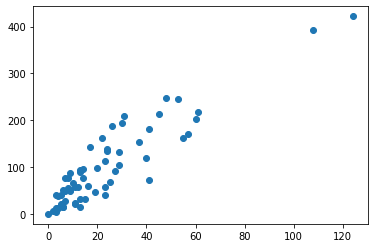

In [8]:
dataset = pd.read_csv('train/insurance.csv',skiprows=list(range(0,5)),header=None,names=['claims','total_payment'])
dataset.head()
plt.scatter(dataset.claims, dataset.total_payment)

X = dataset[['claims']]
y = dataset[['total_payment']]

### Batch gradient Descent.

Explaination:

Linear Model
The idea of linear regression is to fit a line to a set of points. So let's use the line function given by:
> f(x)=y=mx+b
 
where m is the slope and b is our y intercept, or for a more general form (multiple variables)
h(x)=θoxo+θ1x1+θ2x2+...+θnxn
 
such that for a single variable where n = 1,
> h(x)= 0xo + 01x1
 
when xo=1 , 
0 : theta

So we can say : 

> H = X(dot)0
 
where theta is our parameters (slope and intercept) and h(x) is our hypothesis or predicted value.

Note : follow matrix rule.,
> To multiply matrices A[m*n] to B[a*b] , n == a


refer : https://www.kaggle.com/kennethjohn/linear-regression-from-scratch

goku mohandas : https://github.com/madewithml/lessons/blob/master/notebooks/02_Basics/01_Linear_Regression/01_PT_Linear_Regression.ipynb

formula : 


Gradients
**Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights.**
> $J(\theta) = \frac{1}{N} \sum_i (y_i - \hat{y}_i)^2  = \frac{1}{N}\sum_i (y_i - X_iW)^2 $

> $\frac{\partial{J}}{\partial{W}} = -\frac{2}{N} \sum_i (y_i - X_iW) X_i = -\frac{2}{N} \sum_i (y_i - \hat{y}_i) X_i$
> $\frac{\partial{J}}{\partial{W}} = -\frac{2}{N} \sum_i (y_i - X_iW)1 = -\frac{2}{N} \sum_i (y_i - \hat{y}_i)1$

ignoring constant '2'and applying leanring rate,

> $\frac{\partial{J}}{\partial{W}} = \frac{learning_rate}{N} \sum_i (y_i - X_iW)1 = \frac{alpha}{N} \sum_i (\hat{y}_i - y_i)1$

W: theta

In [0]:

# perofrming the linear regression
class LinearRegression(object):
    """ Performs LR using batch gradient descnet"""
    
    def __init__(self, X, y, alpha = 0.01, n_iterations = 10000):
        """initialises variables
        
        Parameters : 
        y : numpy array like, output / dependent varaible #population
        X : numpy array like, input / independent variables #profit
        alpha : float, int. Learning rate
        n_iterations : Number of maximum iterations to perform gradient descent
        """
        
        self.y = y;
        
        ''' 
        Till now : X = n x  1 matrix
        But we want in the form thst of we multiplr it with theta(0) matrix it should b in the form of   
                                        theta(not) + theta(1)(x)
        So, for the abouve coefficient to come for each Xi value, we need to include 1 '''

        self.X = self._hstack_one(X) # this process will give us the n x 2 matrix with 1 in 0th column
        
        print(self.X.shape[1]) # X.shape[1] --> number of columns
        self.thetas = np.zeros((self.X.shape[1], 1))  # since X = n x 2, hence thetas = 2 x any for matric multiply rule
        
        self.n_rows = self.X.shape[0]
        
        self.alpha = alpha
        self.n_iterations = n_iterations
        
        print("Cost before fitting: {0:.2f}".format(self.cost()))
        
        
    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a col of 1s for the coeff of bias terms

        Parameters : 
        input_matrix : numpuy array like n x m
        returns:
        numpy array with stacked column of 1s in 0th column"""

        c = np.hstack((np.ones((input_matrix.shape[0], 1)) , input_matrix))
        return c
    
    # loss function
    def cost(self, ): 
        """ Calculates the cost of current configuration"""
        
        y_cap = self.X.dot(self.thetas)  # all zeroes
        
        # (1/rows)*(y`-y)^2 mean squared error
        return (1 / (2 * self.n_rows)) * np.sum((y_cap - self.y) ** 2)
    
    
    def predict(self, new_X):
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)
    
    
    def batch_gradient(self, ):
        y_cap = self.X.dot(self.thetas) # Y` = X.0
        h = y_cap - self.y
        h = np.multiply(self.X, h) # theta_1  --> see next cell for, more multiplicaion details of this
        h = np.sum(h, axis = 0) # taking the summation
        #print("printing h: \n")
        #print(h)
        h = h.reshape(-1, 1) # now we have the two thetas
        
        #this function will return 
        # y` = X(dot)theta
        #(sum((y`-y)^2)*X)
        return h
        
        
    # doing the gradient descent process
    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            """going by the rul oe batchgradient descent
            calculate all the gradient, then update the thetas
            """
            # J(theta) = J(theta) - (leanring_rate/rows)(dj/dj(theta))
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient()) 
            cost = self.cost() # cacl the loss now
            if i%1000 == 0:
                print (f"Epoch: {i}, loss: {cost:.3f}")
               # print("epoch: {0} Loss: {1: .5f}\r".format(i+1, cost), end="")  
                #print("Iteration: {0} Loss: {1: .5f}\r".format(i+1, cost), end="")

In [10]:
dataset.dtypes
dataset.shape

(63, 2)

### Need to normalize data as so much difference between values.

refer : https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

>  def standardize_data(data, mean, std):
> >      return (data - mean)/std



```
Min-max scaling method : (X - Xmin)/(Xmax - Xmin)
```



In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(dataset)
data_scaled[0]

# def standardize_data(data, mean, std):
#     return (data - mean)/std

array([0.87096774, 0.92965419])

In [12]:
X = data_scaled[:, 0]
y = data_scaled[:, 1]

print(X[0])
print(y[0])
print(y.shape)
print(X.shape)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
print(X.shape)
print(y.shape)

0.8709677419354839
0.929654192325912
(63,)
(63,)
(63, 1)
(63, 1)


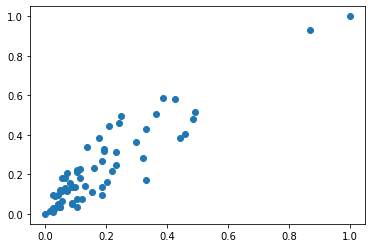

In [13]:
plt.scatter(X, y)

In [14]:
lr = LinearRegression(X, y)
lr.batch_gradient_descent()

2
Cost before fitting: 0.05
Epoch: 0, loss: 0.047
Epoch: 1000, loss: 0.012
Epoch: 2000, loss: 0.008
Epoch: 3000, loss: 0.006
Epoch: 4000, loss: 0.005
Epoch: 5000, loss: 0.004
Epoch: 6000, loss: 0.004
Epoch: 7000, loss: 0.004
Epoch: 8000, loss: 0.004
Epoch: 9000, loss: 0.004


In [15]:
# testing
print(X[0])
print(lr.predict(X)[0])
X.shape

[0.87096774]
[0.89825385]


(63, 1)

[0.87096774]   [0.92965419]   [0.89825385]
[0.15322581]   [0.10942681]   [0.20223629]
[0.10483871]   [0.03718617]   [0.15531376]
[1.]   [1.]   [1.0233806]
[0.32258065]   [0.28280436]   [0.36646515]
[0.45967742]   [0.40478446]   [0.49941233]
[0.18548387]   [0.13477025]   [0.23351798]
[0.11290323]   [0.18356229]   [0.16313418]
[0.36290323]   [0.50686878]   [0.40556726]
[0.08064516]   [0.15466604]   [0.13185249]


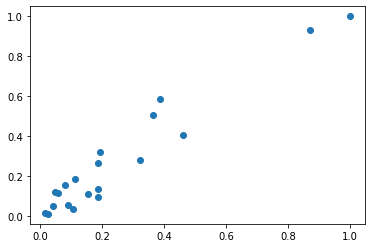

In [16]:
X_train = X[0: 20]
y_train = y[0: 20]
X_test = X[21: 41]
y_test = y[21: 41]
plt.scatter(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

for i in range(10):
    print(X_train[i], " ", y_train[i] , " ", pred_train[i])

In [17]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.01, test_MSE: 0.00


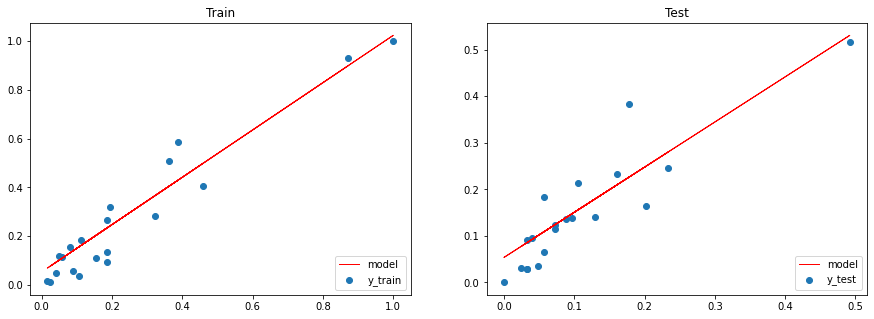

In [18]:
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

#### Conclusion:
Since the dataset is very small, only 60 rows, increasing to epochs to >5000 is giving good predictions.